In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from datetime import datetime
# import libraries
import os
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import DateFormatter
from matplotlib import rc
%matplotlib inline

from numpy.random import seed
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers


from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import math
from datetime import datetime
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
# set random seed
seed(10)
tf.random.set_seed(10)

# filter warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('../input/walmartcleaned/walmart_cleaned.csv')
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data2 = data.loc[data['Weekly_Sales'] > 0]

In [6]:
data2.set_index('Date', inplace=True)

In [7]:
data2.columns

Index(['Unnamed: 0', 'Store', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [8]:
df = data2.drop(['Unnamed: 0','MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5','Type'],axis=1)
train = df[['Weekly_Sales', 'Temperature', 'Fuel_Price',  'CPI', 'Unemployment', 'Size']]

In [9]:
df

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
Date,,,,,,,,,
2010-02-05,1,0,1.0,24924.50,42.31,2.572,211.096358,8.106,151315
2010-02-05,1,0,26.0,11737.12,42.31,2.572,211.096358,8.106,151315
2010-02-05,1,0,17.0,13223.76,42.31,2.572,211.096358,8.106,151315
2010-02-05,1,0,45.0,37.44,42.31,2.572,211.096358,8.106,151315
2010-02-05,1,0,28.0,1085.29,42.31,2.572,211.096358,8.106,151315
...,...,...,...,...,...,...,...,...,...
2012-10-26,45,0,13.0,26240.14,58.85,3.882,192.308899,8.667,118221
2012-10-26,45,0,16.0,2660.02,58.85,3.882,192.308899,8.667,118221
2012-10-26,45,0,32.0,4131.54,58.85,3.882,192.308899,8.667,118221


In [10]:
# Standerized the data using Min Max Scaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df[['Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Size']])

In [11]:
df


array([[0.03596092, 0.43414873, 0.0501002 , 0.84049976, 0.40511788,
        0.63026734],
       [0.01693424, 0.43414873, 0.0501002 , 0.84049976, 0.40511788,
        0.63026734],
       [0.01907916, 0.43414873, 0.0501002 , 0.84049976, 0.40511788,
        0.63026734],
       ...,
       [0.00596095, 0.59598826, 0.70641283, 0.65479569, 0.45888442,
        0.45113588],
       [0.00103565, 0.59598826, 0.70641283, 0.65479569, 0.45888442,
        0.45113588],
       [0.00155359, 0.59598826, 0.70641283, 0.65479569, 0.45888442,
        0.45113588]])

In [12]:

df.shape

(420212, 6)

In [13]:
X=df

In [14]:
X

array([[0.03596092, 0.43414873, 0.0501002 , 0.84049976, 0.40511788,
        0.63026734],
       [0.01693424, 0.43414873, 0.0501002 , 0.84049976, 0.40511788,
        0.63026734],
       [0.01907916, 0.43414873, 0.0501002 , 0.84049976, 0.40511788,
        0.63026734],
       ...,
       [0.00596095, 0.59598826, 0.70641283, 0.65479569, 0.45888442,
        0.45113588],
       [0.00103565, 0.59598826, 0.70641283, 0.65479569, 0.45888442,
        0.45113588],
       [0.00155359, 0.59598826, 0.70641283, 0.65479569, 0.45888442,
        0.45113588]])

In [15]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [16]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X.reshape(X.shape[0], 1, X.shape[1])

In [17]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

2022-06-02 03:29:10.796588: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 6)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 16)             1472      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 4)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 6)              102   

In [18]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size, validation_split=0.05).history

Epoch 1/100


2022-06-02 03:29:11.202322: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


39921/39921 [==============================] - 159s 4ms/step - loss: 0.1194 - val_loss: 0.1164
Epoch 2/100
39921/39921 [==============================] - 155s 4ms/step - loss: 0.0883 - val_loss: 0.1445
Epoch 3/100
39921/39921 [==============================] - 154s 4ms/step - loss: 0.0554 - val_loss: 0.1171
Epoch 4/100
39921/39921 [==============================] - 154s 4ms/step - loss: 0.0495 - val_loss: 0.1062
Epoch 5/100
39921/39921 [==============================] - 156s 4ms/step - loss: 0.0427 - val_loss: 0.1017
Epoch 6/100
39921/39921 [==============================] - 155s 4ms/step - loss: 0.0380 - val_loss: 0.1030
Epoch 7/100
39921/39921 [==============================] - 154s 4ms/step - loss: 0.0371 - val_loss: 0.0914
Epoch 8/100
39921/39921 [==============================] - 156s 4ms/step - loss: 0.0364 - val_loss: 0.0914
Epoch 9/100
39921/39921 [==============================] - 152s 4ms/step - loss: 0.0359 - val_loss: 0.0941
Epoch 10/100
39921/39921 [=======================

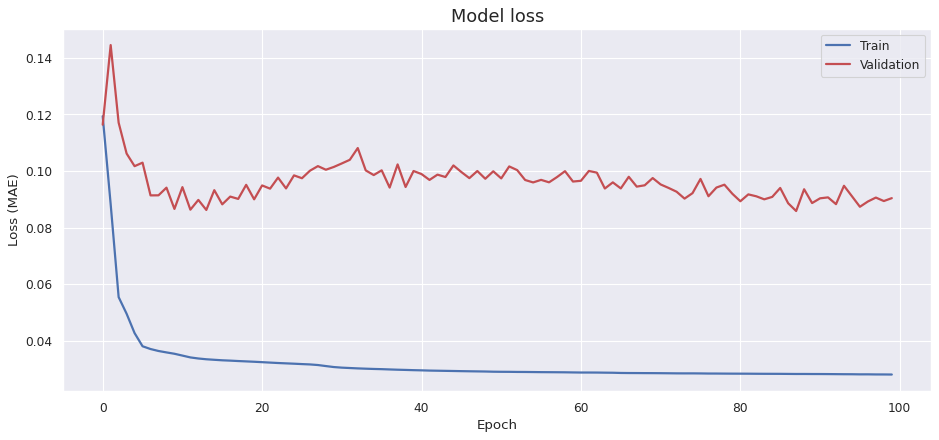

In [19]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (MAE)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [20]:
train.columns

Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Size'],
      dtype='object')

(0.0, 0.13)

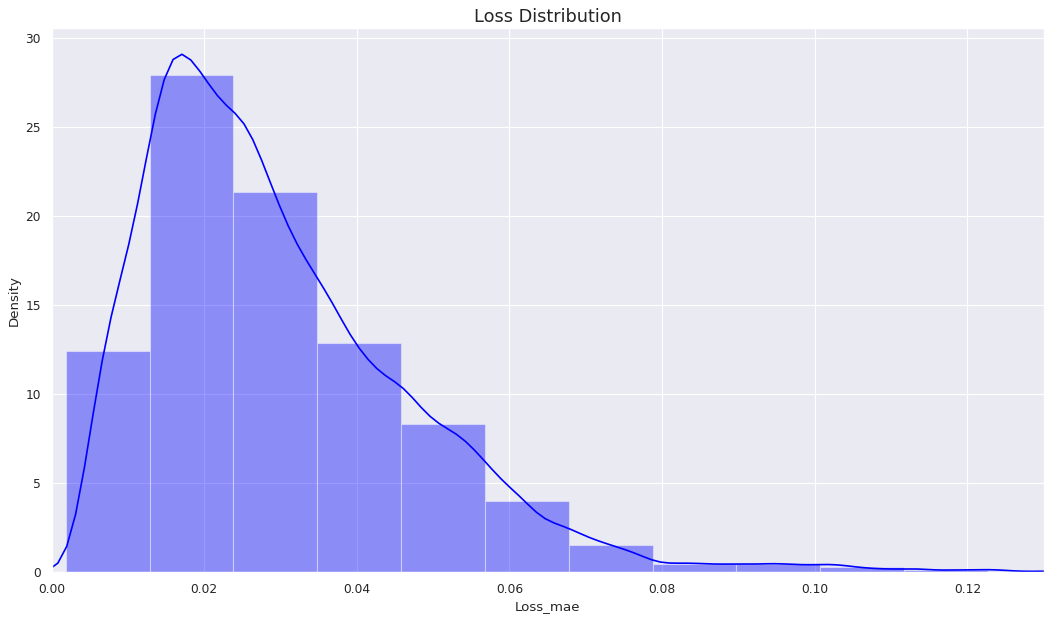

In [21]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.13])

In [22]:
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
X_train1 = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train1), axis = 1)
scored['Threshold'] = 0.15
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']

anomalies = scored[scored.Anomaly == True]
anomalies.head()

,Loss_mae,Threshold,Anomaly
Date,,,
2010-11-26,0.219417,0.15,True
2010-12-24,0.159510,0.15,True
2010-12-24,0.160170,0.15,True
2011-11-25,0.173566,0.15,True
2010-11-26,0.175650,0.15,True


In [23]:
anomalies.shape

(5648, 3)

(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

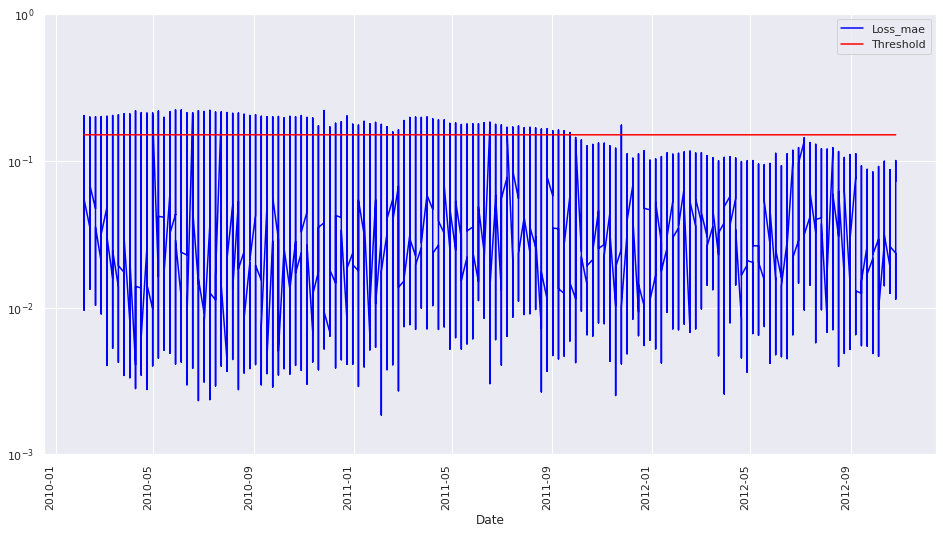

In [24]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-3,1e-0], color=['blue','red'])
plt.xticks(rotation=90)

In [25]:
train.columns

Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Size'],
      dtype='object')